Load the preprocessed data(new.csv)

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [18]:
data = np.genfromtxt('new.csv',delimiter=",",skiprows=1)
data.shape

(17545, 6)

In [37]:
import time
start = time.time()

X=data[:,0:5]
y=data[:,5]
# instantiate a logistic regression model, and fit with X and y
model = RandomForestClassifier()
model = model.fit(X, y)

# check the accuracy on the training set
print model.score(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)

end = time.time()
elapsed = end - start
print elapsed

0.997549159305
0.459398984909


In [20]:
y.mean()

0.080535765175263604

In [21]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[ 0.  0.  0. ...,  0.  0.  0.]


In [23]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


In [24]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)

0.960296352584


In [25]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[4815   29]
 [ 180  240]]
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98      4844
        1.0       0.89      0.57      0.70       420

avg / total       0.96      0.96      0.96      5264



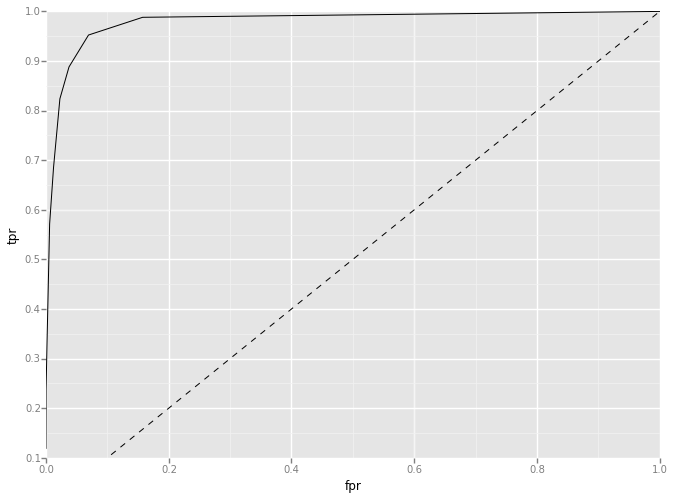

<ggplot: (279099985)>

In [26]:
from sklearn import metrics
import pandas as pd
from ggplot import *

fpr, tpr, _ = metrics.roc_curve(y_test, probs[:,1])

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

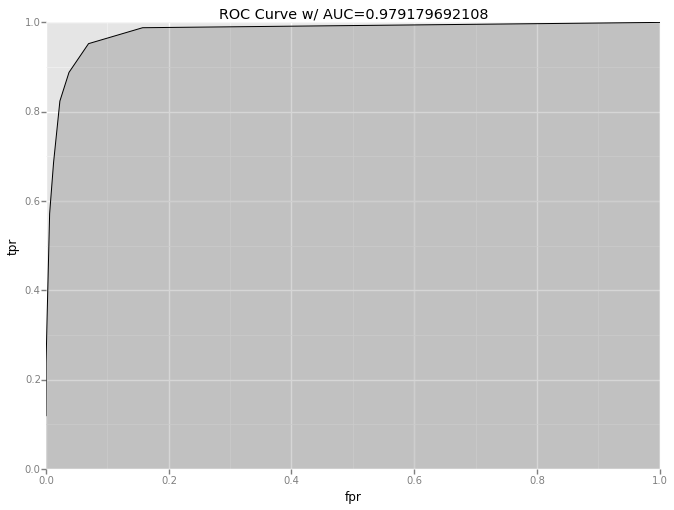

<ggplot: (279298309)>

In [36]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [27]:
print metrics.roc_auc_score(y_test, probs[:, 1])

0.979179692108


In [28]:
probs.shape

(5264, 2)

In [29]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.62243736  0.92482916  0.91168091  0.92246294  0.91904219  0.78392246
  0.87571266  0.91163056  0.91277081  0.87628278]
0.866077182786


Feature importance analysis

In [30]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)

[ 0.16670115  0.22685973  0.15465514  0.2132779   0.23850607]


Select zone co2 and zone temp as major feature

In [31]:
occ_index = np.nonzero(y)

In [32]:
print occ_index

(array([   66,    67,    68, ..., 17470, 17471, 17472]),)


In [33]:
un_index = np.delete(np.array(range(0,17545)),occ_index)

In [34]:
print un_index

[    0     1     2 ..., 17542 17543 17544]


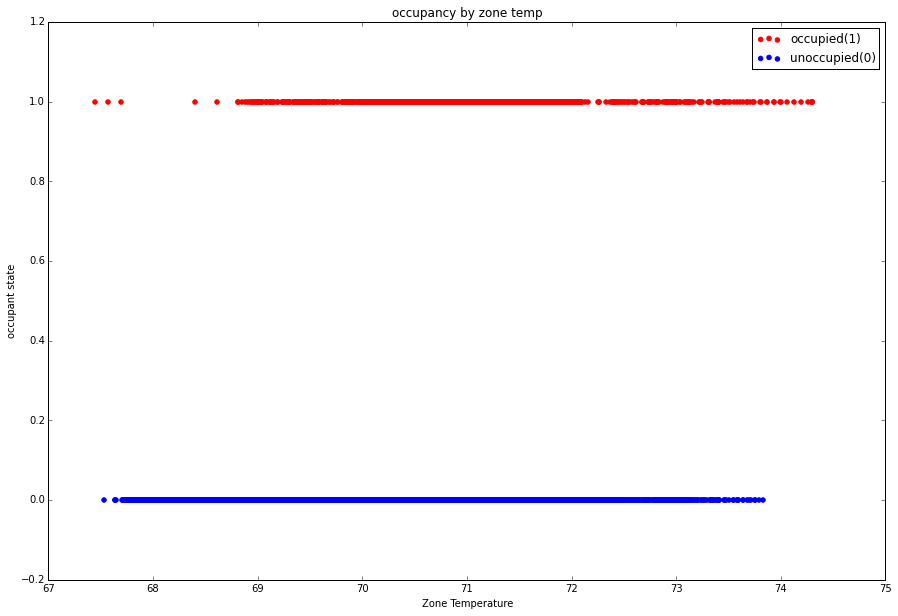

In [104]:
plt.figure(figsize=(15,10))
plt.scatter(X[occ_index,4],y[occ_index],color='r')
plt.scatter(X[un_index,4],y[un_index],color='b')
plt.legend(['occupied(1)','unoccupied(0)'])
plt.title('occupancy by 1d')
plt.ylabel('occupant state')
plt.xlabel('Zone Temperature')

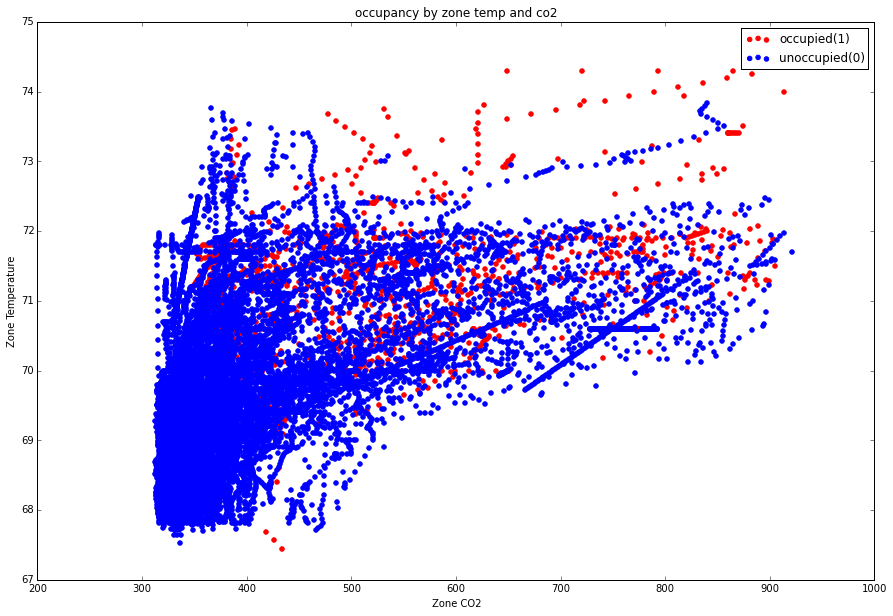

In [106]:
plt.figure(figsize=(15,10))
plt.scatter(X[occ_index,3],X[occ_index,4],color='red')
plt.scatter(X[un_index,3],X[un_index,4],color='blue')
plt.legend(['occupied(1)','unoccupied(0)'])
plt.title('occupancy by 2d')
plt.ylabel('Zone Temperature')
plt.xlabel('Zone CO2')

-60


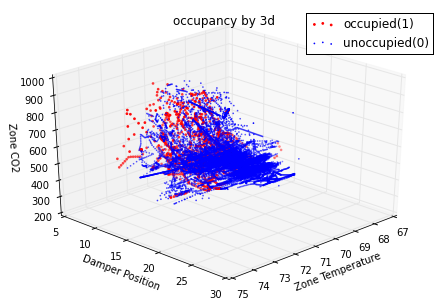

In [128]:
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D



fig = pylab.figure()
ax = Axes3D(fig)


ax.scatter(X[occ_index,4],X[occ_index,1],X[occ_index,3],color='r',s=3)
ax.scatter(X[un_index,4],X[un_index,1],X[un_index,3],color='b',s=0.5)

# Get current rotation angle
print ax.azim
 
# Set rotation angle to 30 degrees
ax.view_init(azim=45)

plt.legend(['occupied(1)','unoccupied(0)'])
plt.title('occupancy by 3d')
ax.set_ylabel('Damper Position')
ax.set_xlabel('Zone Temperature')
ax.set_zlabel('Zone CO2')